# (Split 7/3)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [14230.99970634 14261.84449302 14292.6892797  14323.53406638
 14354.37885307 14385.22363975 14416.06842643 14446.91321311
 14477.75799979 14508.60278648 14539.44757316 14570.29235984
 14601.13714652 14631.9819332  14662.82671989 14693.67150657
 14724.51629325 14755.36107993 14786.20586661 14817.0506533
 14847.89543998 14878.74022666 14909.58501334 14940.42980002
 14971.27458671 15002.11937339 15032.96416007 15063.80894675
 15094.65373343 15125.49852012]
Future Predictions (60 days): [15156.3433068  15187.18809348 15218.03288016 15248.87766684
 15279.72245353 15310.56724021 15341.41202689 15372.25681357
 15403.10160025 15433.94638694 15464.79117362 15495.6359603
 15526.48074698 15557.32553366 15588.17032035 15619.01510703
 15649.85989371 15680.70468039 15711.54946707 15742.39425376
 15773.23904044 15804.08382712 15834.9286138  15865.77340048
 15896.61818717 15927.46297385 15958.30776053 15989.15254721
 16019.99733389 16050.84212058]
Future Predictions (90 d

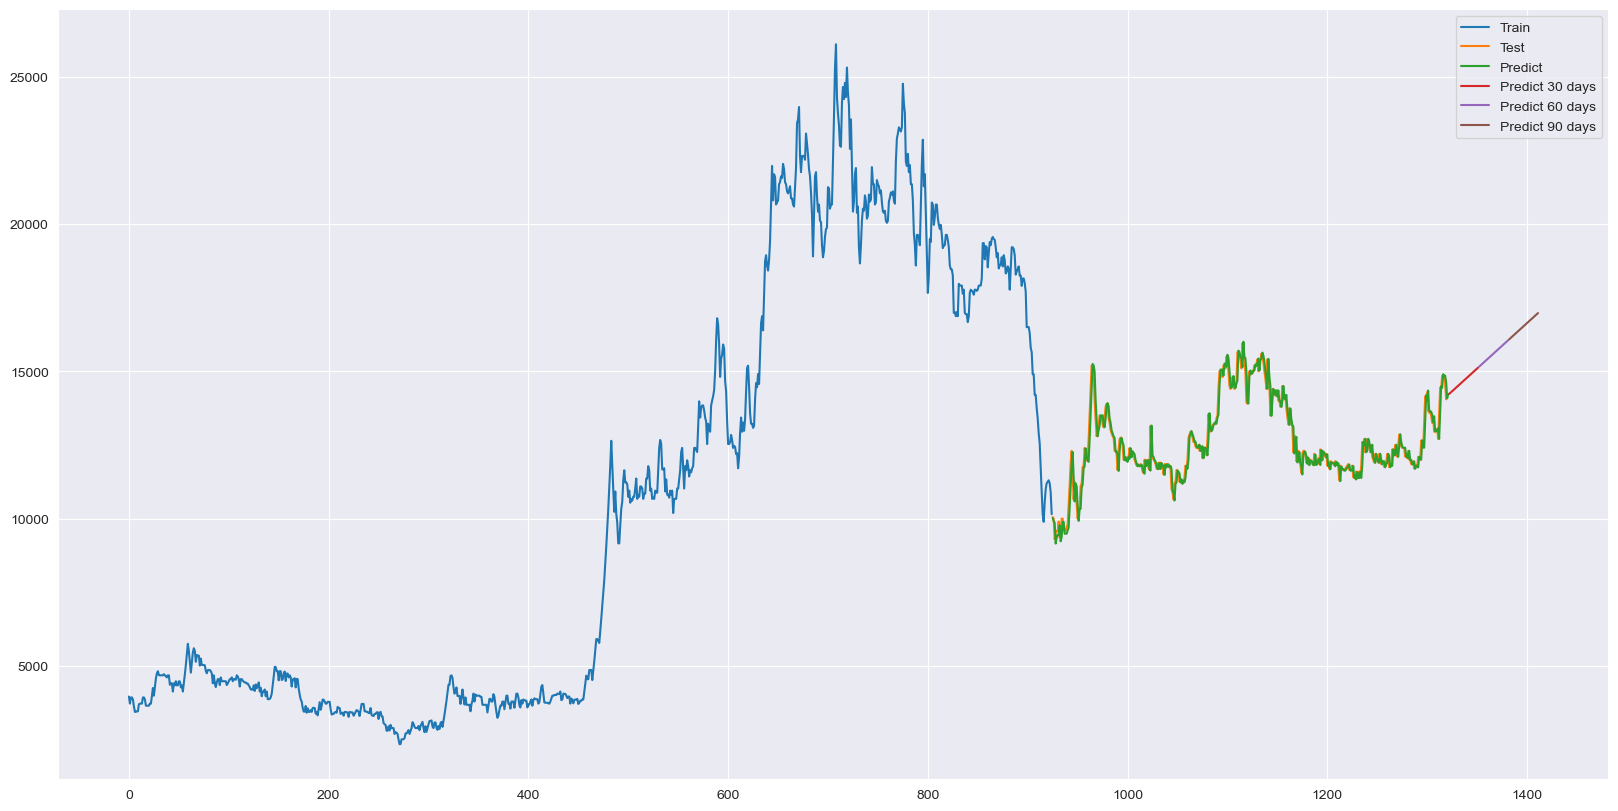

In [9]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\SGT.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()


# (Split 8/2)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [14230.99970634 14261.84449302 14292.6892797  14323.53406638
 14354.37885307 14385.22363975 14416.06842643 14446.91321311
 14477.75799979 14508.60278648 14539.44757316 14570.29235984
 14601.13714652 14631.9819332  14662.82671989 14693.67150657
 14724.51629325 14755.36107993 14786.20586661 14817.0506533
 14847.89543998 14878.74022666 14909.58501334 14940.42980002
 14971.27458671 15002.11937339 15032.96416007 15063.80894675
 15094.65373343 15125.49852012]
Future Predictions (60 days): [15156.3433068  15187.18809348 15218.03288016 15248.87766684
 15279.72245353 15310.56724021 15341.41202689 15372.25681357
 15403.10160025 15433.94638694 15464.79117362 15495.6359603
 15526.48074698 15557.32553366 15588.17032035 15619.01510703
 15649.85989371 15680.70468039 15711.54946707 15742.39425376
 15773.23904044 15804.08382712 15834.9286138  15865.77340048
 15896.61818717 15927.46297385 15958.30776053 15989.15254721
 16019.99733389 16050.84212058]
Future Predictions (90 d

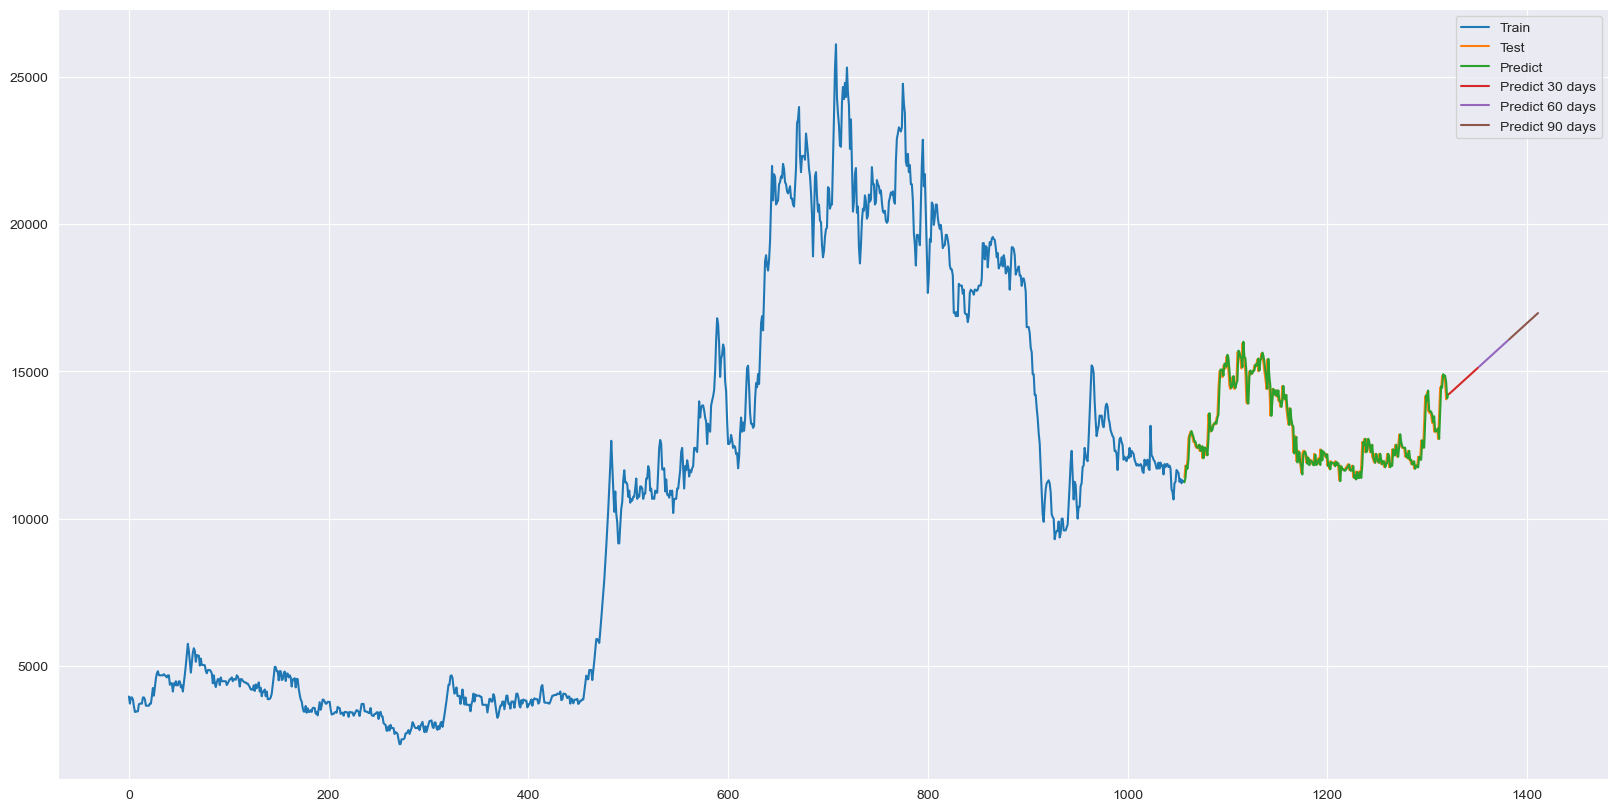

In [10]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\SGT.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()


# (Split 9/1)

C:\Users\LENOVO\anaconda3\envs\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Future Predictions (30 days): [14230.99970634 14261.84449302 14292.6892797  14323.53406638
 14354.37885307 14385.22363975 14416.06842643 14446.91321311
 14477.75799979 14508.60278648 14539.44757316 14570.29235984
 14601.13714652 14631.9819332  14662.82671989 14693.67150657
 14724.51629325 14755.36107993 14786.20586661 14817.0506533
 14847.89543998 14878.74022666 14909.58501334 14940.42980002
 14971.27458671 15002.11937339 15032.96416007 15063.80894675
 15094.65373343 15125.49852012]
Future Predictions (60 days): [15156.3433068  15187.18809348 15218.03288016 15248.87766684
 15279.72245353 15310.56724021 15341.41202689 15372.25681357
 15403.10160025 15433.94638694 15464.79117362 15495.6359603
 15526.48074698 15557.32553366 15588.17032035 15619.01510703
 15649.85989371 15680.70468039 15711.54946707 15742.39425376
 15773.23904044 15804.08382712 15834.9286138  15865.77340048
 15896.61818717 15927.46297385 15958.30776053 15989.15254721
 16019.99733389 16050.84212058]
Future Predictions (90 d

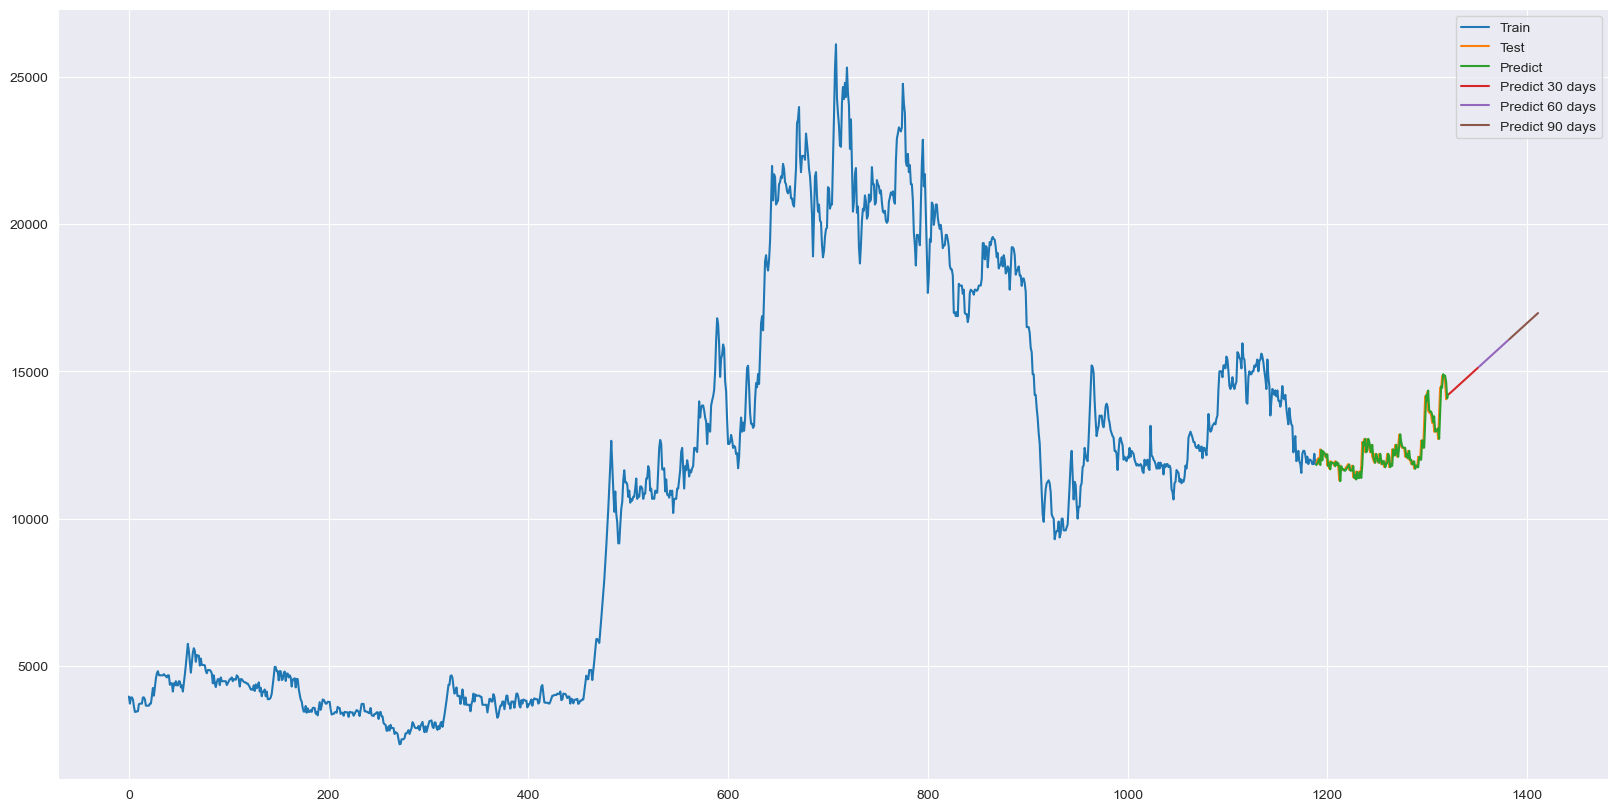

In [11]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('D:\\Workspace\\23-24_HK2\\IS403-PTDLKD\\dataset\\SGT.csv')

# Lấy cột 'Close'
data1 = data.reset_index()['close']

# Chia train/test theo tỉ lệ
train_size = int(0.9 * len(data1))
test_size = len(data1) - train_size

train_data = data[:train_size]
test_data = data[train_size:]

# Convert train_data to numpy array
y_train = np.array(data['close'])

# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add')
fit_model = model.fit()

# Make predictions for test_data
test_predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Make predictions for the next 30, 60, 90 days
future_predictions_30 = fit_model.predict(start=data1.index[-1]+1, end=data1.index[-1]+30)
future_predictions_60 = fit_model.predict(start=data1.index[-1]+31, end=data1.index[-1]+60)
future_predictions_90 = fit_model.predict(start=data1.index[-1]+61, end=data1.index[-1]+90)

print("Future Predictions (30 days):", future_predictions_30)
print("Future Predictions (60 days):", future_predictions_60)
print("Future Predictions (90 days):", future_predictions_90)

# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((test_predictions - test_data['close'])**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(np.abs(test_predictions - test_data['close']))
print('Testing MAE:', test_mae)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs((test_predictions - test_data['close']) / test_data['close'])) * 100
print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MLSE
test_mlse = mean_squared_log_error(test_data['close'], test_predictions)
print('Testing MLSE:', test_mlse)

# Vẽ hình
plt.figure(figsize=(20,10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['close'], label='Train')
test_data_index = pd.RangeIndex(start=train_size, stop=len(data), step=1)
plt.plot(test_data_index, test_data['close'], label='Test')
plt.plot(test_data_index, test_predictions, label='Predict')

# Vẽ dự đoán cho 30 ngày tiếp theo
predict_data_index_30 = pd.RangeIndex(start=len(data), stop=len(data)+30, step=1)
plt.plot(predict_data_index_30, future_predictions_30, label='Predict 30 days')

# Vẽ dự đoán cho 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(data)+30, stop=len(data)+60, step=1)
plt.plot(predict_data_index_60, future_predictions_60, label='Predict 60 days')

# Vẽ dự đoán cho 90 ngày tiếp theo
predict_data_index_90 = pd.RangeIndex(start=len(data)+60, stop=len(data)+90, step=1)
plt.plot(predict_data_index_90, future_predictions_90, label='Predict 90 days')

plt.legend()
plt.show()
